<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-simulation:-population-model" data-toc-modified-id="Model-simulation:-population-model-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Model simulation: population model</a></span></li><li><span><a href="#Model-simulation" data-toc-modified-id="Model-simulation-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Model simulation</a></span></li><li><span><a href="#Impact-of-initial-conditions-and-$m_2$-migration-rate" data-toc-modified-id="Impact-of-initial-conditions-and-$m_2$-migration-rate-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Impact of initial conditions and $m_2$ migration rate</a></span></li><li><span><a href="#Impact-of-the-ecosystem-maximum-capacity-parameters" data-toc-modified-id="Impact-of-the-ecosystem-maximum-capacity-parameters-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Impact of the ecosystem maximum capacity parameters</a></span></li><li><span><a href="#Impact-of-the-natural-death-rates" data-toc-modified-id="Impact-of-the-natural-death-rates-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Impact of the natural death rates</a></span></li><li><span><a href="#Impact-of-the-rate-of-growth/birth-parameters" data-toc-modified-id="Impact-of-the-rate-of-growth/birth-parameters-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Impact of the rate of growth/birth parameters</a></span></li><li><span><a href="#Impact-of-lethal-encounter-parameters" data-toc-modified-id="Impact-of-lethal-encounter-parameters-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Impact of lethal encounter parameters</a></span></li></ul></li><li><span><a href="#Sensitivity-analysis-of-the-population-model" data-toc-modified-id="Sensitivity-analysis-of-the-population-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sensitivity analysis of the population model</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test</a></span></li></ul></div>

## Model simulation: population model

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

In [1]:
%matplotlib inline

# Importing python functionalities
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Label

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
# We import all of our functions prepared in advanced
%aimport general_functions


In [2]:
%aimport population
function_derivatives = population.model_derivatives

## Model simulation

**Implementation note for advanced users**: We access the function ```model``` available in the script ```general_functions.py``` (that we have loaded previously) as ```general_functions.model```. This functions solves the ODEs provided by ```function_derivatives``` with initial conditions and parameter values. The results are plotted automatically in one figure with the same axis. Everything is done when this function is called. The results are stored in a variable called ```df``` (short for dataframe, which is a special data type from the ```pandas``` library which is convenient to store and manipulate data).

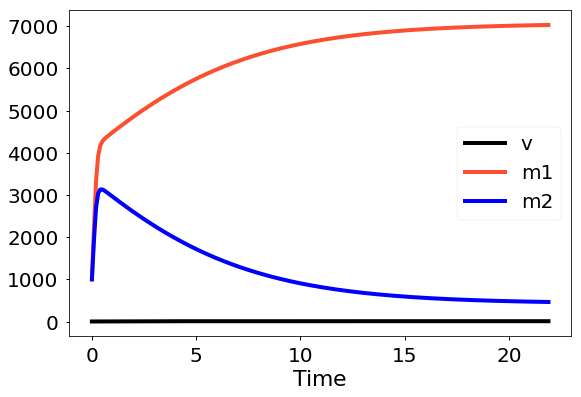

In [3]:
df = general_functions.model(
    np.arange(0., 22, 0.1), # time steps
    [3, 1000, 1000], # initial conditions
    ['v','m1', 'm2'], # naming variables
    function_derivatives, # name function derivatives
    returnDataFrame=True, plotresults=True,
    # as of here: function specific parameters
    r_v=1, K_v=10, K_m=8000, d_nv=0.06, d_n1=0.9, d_n2=1, r_1=14.2, r_2=12.1,
    alpha_1=0.00005, alpha_2=0.00006, m2_in=100)
    

Since $v$ has different order of magnitude compared to $m_1$ and $m_2$, it is more logic to plot $v$ on a different scale (Please note that other colors are now used).

**Implementation note**: Since we have our results stored in ```df```, we will use this to plot them on a separate figure (using the ```matplotlib``` library). We access the data as ```df[name_of_the_variable]```.

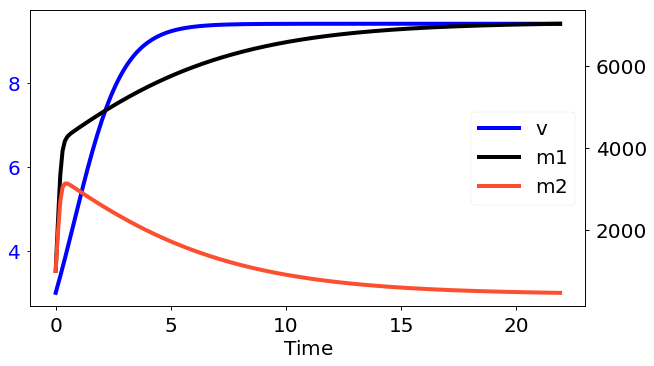

In [4]:
fig, ax1 = plt.subplots(figsize=(9,5))        # We prepare a graph
ax1_twin = ax1.twinx()                        # We ensure a double y-axis
plot = ax1.plot(df['v'], color='blue',label=r'$\mathrm{v}$')     # We plot v first in blue
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')
plot_twin1 = ax1_twin.plot(df['m1'],label=r'$\mathrm{m1}$');  # We plot m1 on the 'twin'-axis 
plot_twin2 = ax1_twin.plot(df['m2'],label=r'$\mathrm{m2}$');  # We plot m2 on the 'twin'-axis
ax1.set_xlabel(r'$\mathrm{Time}$', fontsize=20,rotation=0)
# These three lines is just to have legend labels when involving multiple axis
plots = plot + plot_twin1 + plot_twin2
labs = [leg.get_label() for leg in plots]
ax1.legend(plots, labs, loc=5)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.show()

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of initial conditions and $m_2$ migration rate

**Implementation note**: We create a function ```interactive_model``` which accepts values of initial conditions and m2_in as parameters to pass to our function ```general_functions.model```. In this way, we can use the python library ```ipywidgets``` (that we load previously) which has a function ```interact``` that is able to create some sliders for the parameters that we have just provided (from the function ```interactive_model```).

In [5]:
def interactive_model(v, m1, m2, m2_in):
    general_functions.model(
        np.arange(0., 22, 0.1), # time steps
        [v, m1, m2], # initial conditions
        ['v', 'm1', 'm2'], # names variables
        function_derivatives, # name function derivatives
        returnDataFrame=False, plotresults=True,
        # as of here: function specific parameters
        r_v=1, K_v=10, K_m=8000, d_nv=0.06, d_n1=0.9, d_n2=1, r_1=14.2, r_2=12.1,
        alpha_1=0.00005, alpha_2=0.00006, m2_in=m2_in)
   
interact(interactive_model,
         v=fixed(3),
         m1=FloatSlider(value=1000, min=0, max=2000, step=100, description=r'$m_{1}$', continuous_update=False),
         m2=FloatSlider(value=1000, min=0, max=2000, step=100, description=r'$m_{2}$', continuous_update=False),
         m2_in=FloatSlider(value=100, min=0, max=1200, step=10, description=r'$m_{2,in}$', continuous_update=False));

interactive(children=(FloatSlider(value=1000.0, continuous_update=False, description='$m_{1}$', max=2000.0, st…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of the ecosystem maximum capacity parameters

In [6]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         r_v=fixed(1),
         K_v=FloatSlider(value=10, min=0., max=20, step=1, name=r'$K_{v}$', continuous_update=False),
         K_m=FloatSlider(value=8000, min=0., max=16000, step=500, name=r'$K_{m}$', continuous_update=False),
         d_nv=fixed(0.06), d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='K_v', max=20.0, step=1.0),…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of the natural death rates

In [7]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000),
         d_n1=FloatSlider(value=0.9, min=0., max=1.8, step=.1, name=r'$d_{n1}$', continuous_update=False),
         d_n2=FloatSlider(value=1, min=0., max=2, step=.1, name=r'$d_{n2}$', continuous_update=False),
         d_nv=fixed(0.06), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='d_n1', max=1.8), FloatSlide…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of the rate of growth/birth parameters

In [8]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), d_n1=fixed(0.9), d_n2=fixed(1), 
         r_1=FloatSlider(value=14.2, min=0., max=30, step=.2, name=r'$r_1$', continuous_update=False),
         r_2=FloatSlider(value=12.1, min=0., max=30, step=.2, description=r'$r_2$', continuous_update=False),
         d_nv=fixed(0.06), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(FloatSlider(value=14.2, continuous_update=False, description='r_1', max=30.0, step=0.2),…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of lethal encounter parameters

In [9]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), d_n1=fixed(0.9), d_n2=fixed(1), 
         alpha_1=FloatSlider(value=3e-5, min=0., max=1e-3, step=2e-5, name=r'$\alpha_1$', continuous_update=False,readout_format='.5f'),
         alpha_2=FloatSlider(value=3e-5, min=0., max=1e-3, step=2e-5, name=r'$\alpha_2$', continuous_update=False,readout_format='.5f'),
         d_nv=fixed(0.06), r_1=fixed(14.2), r_2=fixed(12.1), m2_in=fixed(100));

interactive(children=(FloatSlider(value=3e-05, continuous_update=False, description='alpha_1', max=0.001, read…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

# Sensitivity analysis of the population model

In [10]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0., 22, 0.1)), # time steps
    init=fixed([3, 1000, 1000]), # initial conditions
    varnames=fixed(['v','m1', 'm2']), # names variables
    f=fixed(function_derivatives), # name function derivatives
    parametername=ToggleButtons(options=['r_v', 'K_v', 'K_m', 'd_nv', 'd_n1',
        'd_n2', 'r_1', 'r_2', 'alpha_1', 'alpha_2', 'm2_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=-1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), d_nv=fixed(0.06),
    d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1),
    alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(ToggleButtons(description='parametername', options=('r_v', 'K_v', 'K_m', 'd_nv', 'd_n1',…